In [3]:
import os, math
from slicing_inference import sahi_slicing_inference
from inference_modular import ship_detection
from PIL import Image 
import numpy as np
from imageutils import resize_img
import torch

In [4]:
image_path=r"D:\NLP 1\Sat_object_detection\debug_images\2.jpg"
image_path=r"D:\NLP 1\Sat_object_detection\inference_images\dd4ffcb5c.jpg"
images_path = r"D:\NLP 1\Sat_object_detection\inference_images"
images_path = r"D:\NLP 1\Sat_object_detection\debug_images_2"

Directory mode

In [27]:
from inference_modular import ship_detection

# images_dir = r"D:\NLP 1\Sat_object_detection\debug_images_2"
images_dir = r"D:\NLP 1\Sat_object_detection\debug_images_3"
# images_dir = r"D:\NLP 1\Sat_object_detection\inference_images"

coord = {"0c0d90d8d.jpg": [58.4893887115, 23.6396684794, 58.4961460224, 23.6487324542],
         "2d1b074cb.jpg": [47.3562147890, 26.3220918742, 47.3646843251, 26.3311658917],}

result = ship_detection(images=images_dir, bbox_coord_wgs84=coord, annotations=["score", "length", "coord"], nms_iou_threshold=0.1, scale_down_factor= "adaptive",
                        adaptive_scale_down_parameters = {'a': 0.3, 'b': 1, 'threshold': 1.5}, model_input_dim=768, confidence_threshold=0.85, sahi_overlap_ratio=0.3,
                        output_annotated_image=True, save_annotated_image=True, annotation_font_size=17, annotation_bbox_width=3, output_original_image=True)

Processing 058358044.jpg
Performing prediction on 1 number of slices.
Processing 1.jpg
Performing prediction on 4 number of slices.
10 bboxes found in 1.jpg
Processing 12572286c.jpg
Performing prediction on 1 number of slices.
Processing 14013864b.jpg
Performing prediction on 1 number of slices.
Processing 26095039a.jpg
Performing prediction on 1 number of slices.
Processing 26823809a.jpg
Performing prediction on 1 number of slices.
1 bboxes found in 26823809a.jpg
Processing 2d1b074cb.jpg
Performing prediction on 1 number of slices.
5 bboxes found in 2d1b074cb.jpg
Processing 2_2.jpg
Performing prediction on 9 number of slices.
13 bboxes found in 2_2.jpg
Processing 38168248b.jpg
Performing prediction on 1 number of slices.
1 bboxes found in 38168248b.jpg
Processing 38988163c.jpg
Performing prediction on 1 number of slices.
1 bboxes found in 38988163c.jpg
Processing 55236555e.jpg
Performing prediction on 1 number of slices.
Processing 7242578f3.jpg
Performing prediction on 1 number of sl

In [5]:
result["2d1b074cb.jpg"]

{'n_obj': 5,
 'bboxes': array([[623.48035 , 235.7248  , 672.6443  , 348.84637 ],
        [356.6679  ,  23.62661 , 412.32727 , 103.08192 ],
        [311.4162  , 457.86655 , 377.58044 , 535.9262  ],
        [649.2584  , 724.242   , 689.8866  , 768.      ],
        [641.7778  , 102.90326 , 660.8973  , 115.231415]], dtype=float32),
 'scores': array([0.999728  , 0.99943763, 0.99943274, 0.997042  , 0.8990918 ],
       dtype=float32),
 'original_image': <PIL.Image.Image image mode=RGB size=768x768>,
 'ships_long_lat': [(47.363361647318, 26.325545265476),
  (47.360455044484, 26.322840412864),
  (47.360013930889, 26.327962767803),
  (47.363598862624, 26.330907388203),
  (47.363397766443, 26.323380518634)],
 'ships_lengths': [158.1, 121.0, 125.7, 72.8, 26.5],
 'ships_bbox_dimensions': [(148.6, 54.0),
  (104.4, 61.2),
  (102.6, 72.7),
  (57.5, 44.7),
  (21.0, 16.2)],
 'annotated_image': <PIL.Image.Image image mode=RGB size=768x768>}

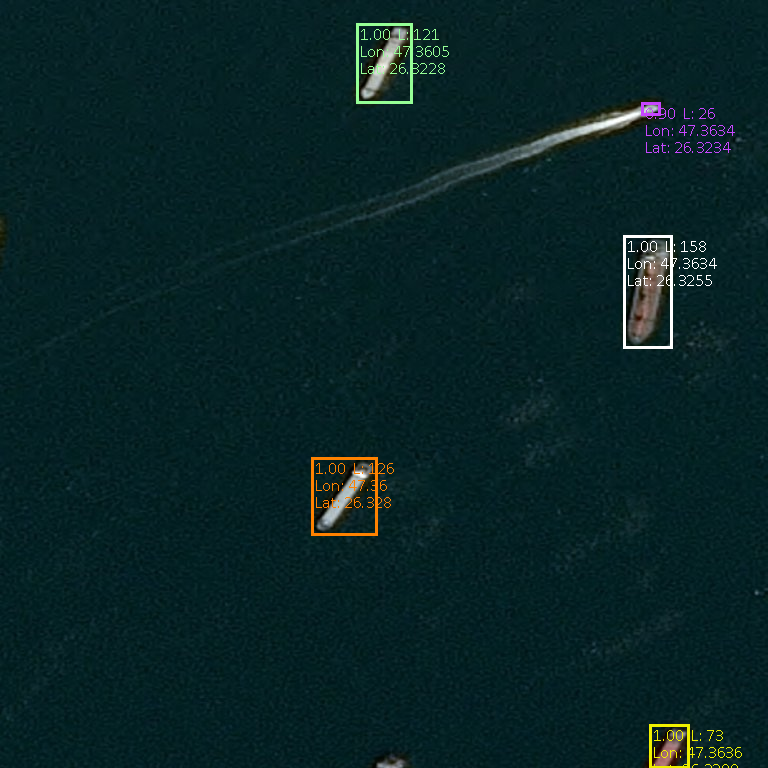

In [4]:
# result["2d1b074cb.jpg"]["original_image"]
result["2d1b074cb.jpg"]["annotated_image"]

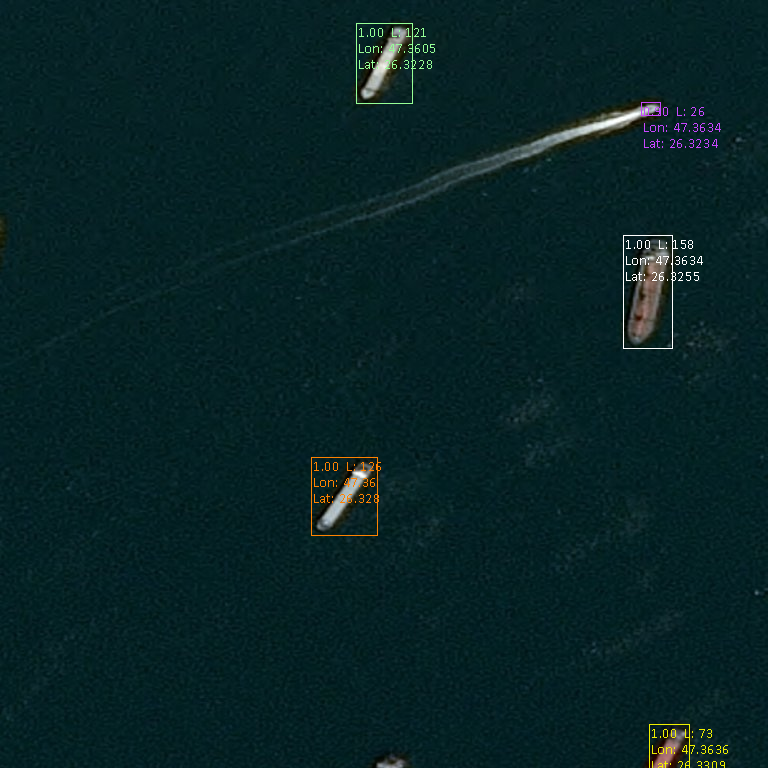

In [26]:
from imageutils import draw_bbox_torchvision

image = result["2d1b074cb.jpg"]
annotated_image = draw_bbox_torchvision(image=image["original_image"], bboxes=image["bboxes"], scores=image["scores"], lengths=image["ships_lengths"], 
                        ships_coords=image["ships_long_lat"], annotations=["score", "length", "coord"], save=False, image_save_name=r"C:\Users\user2\Desktop\b.jpg",
                        output_annotated_image=True, font_size=15, font=r"calibri.ttf", bbox_width=1)
annotated_image

In [11]:
result["2d1b074cb.jpg"]["ships_long_lat"]

[(47.363361647318, 26.325545265476),
 (47.360455044484, 26.322840412864),
 (47.360013930889, 26.327962767803),
 (47.363598862624, 26.330907388203),
 (47.363397766443, 26.323380518634)]

In [6]:
result["dad047800.jpg"]

{'n_obj': 1,
 'bboxes': array([[654.29596, 390.60574, 738.73663, 463.9622 ]], dtype=float32),
 'scores': array([0.9989256], dtype=float32),
 'original_image': <PIL.Image.Image image mode=RGB size=768x768>,
 'annotated_image': <PIL.Image.Image image mode=RGB size=768x768>}

Images dictionary mode

Single image mode

In [1]:
from inference_modular import ship_detection
from PIL import Image
# images_path = r"D:\NLP 1\Sat_object_detection\inference_images"
images_path = r"D:\NLP 1\Sat_object_detection\debug_images_2\e7e24507a.jpg"
images_path = r"D:\NLP 1\Sat_object_detection\debug_images_2\2.jpg"
img = Image.open(images_path)
print(type(img))
coord = {"0c0d90d8d.jpg": [58.4893887115,23.6396684794,58.4961460224,23.6487324542]}

result = ship_detection(images=img, bbox_coord_wgs84=coord, annotations=["length", "coord"], nms_iou_threshold=0.1,
                        confidence_threshold=0.8, sahi_overlap_ratio=0.3, output_annotated_image=True, save_annotated_image=False, output_original_image=True)

D:\NLP 1\venv\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
D:\NLP 1\venv\Lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pyto

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Processing prediction
Performing prediction on 40 number of slices.
15 bboxes found in prediction
<class 'PIL.Image.Image'>
[[2603.2327  1696.1818  2656.5952  1754.404  ]
 [2404.616   1446.2915  2461.3486  1511.8029 ]
 [2393.7095   847.49524 2418.5342   921.32385]
 [1809.9097  1024.9023  1896.1213  1335.1992 ]
 [2409.4749   760.7357  2483.0593   784.82043]
 [3390.2861   836.38904 3453.3347  1015.72705]
 [ 365.84445  314.21194  422.8798   333.62717]
 [3439.2388   777.1983  3473.0208   884.50696]
 [2183.4968  1810.606   2412.0706  2065.0852 ]
 [3372.0964   786.3285  3392.4302   850.75415]
 [2690.      1814.7228  2750.5176  1901.4861 ]
 [3438.5762   877.3353  3456.8074   942.7473 ]
 [3401.102    863.8792  3416.3147   912.48816]
 [1250.1177  1857.4233  1257.2233  1865.4614 ]
 [3313.91     767.03436 3372.4404   793.36536]]
[0.99917066 0.9979693  0.99656975 0.9948953  0.9942054  0.9907505
 0.9888976  0.98585296 0.9703456  0.96816874 0.96496546 0.93

In [11]:
result.keys()

dict_keys(['n_obj', 'bboxes', 'scores', 'original_image', 'ships_long_lat', 'ships_length', 'ships_bbox_dimensions', 'annotated_image'])

In [ ]:
result["annotated_image"]
# result["original_image"]

Use draw_bbox_torchvision separately

In [ ]:
from imageutils import draw_bbox_torchvision
annotated_image = draw_bbox_torchvision(image=result["original_image"], bboxes=result["bboxes"], scores=result["scores"], lengths=result["ships_length"], 
                        ships_coords=result["ships_long_lat"], annotations=["score"], save=True, image_save_name=r"C:\Users\user2\Desktop\b.jpg", output_annotated_image=True)
annotated_image

Drafts

In [20]:
images_names = ["Image{0:03}".format(i) for i in range(100)]
images = [i for i in range(100)]

images_dict = {images_names[i]:{"image": images[i]} for i in range(len(images_names))}
images_dict

['Image000', 'Image001', 'Image002', 'Image003', 'Image004', 'Image005', 'Image006', 'Image007', 'Image008', 'Image009', 'Image010', 'Image011', 'Image012', 'Image013', 'Image014', 'Image015', 'Image016', 'Image017', 'Image018', 'Image019', 'Image020', 'Image021', 'Image022', 'Image023', 'Image024', 'Image025', 'Image026', 'Image027', 'Image028', 'Image029', 'Image030', 'Image031', 'Image032', 'Image033', 'Image034', 'Image035', 'Image036', 'Image037', 'Image038', 'Image039', 'Image040', 'Image041', 'Image042', 'Image043', 'Image044', 'Image045', 'Image046', 'Image047', 'Image048', 'Image049', 'Image050', 'Image051', 'Image052', 'Image053', 'Image054', 'Image055', 'Image056', 'Image057', 'Image058', 'Image059', 'Image060', 'Image061', 'Image062', 'Image063', 'Image064', 'Image065', 'Image066', 'Image067', 'Image068', 'Image069', 'Image070', 'Image071', 'Image072', 'Image073', 'Image074', 'Image075', 'Image076', 'Image077', 'Image078', 'Image079', 'Image080', 'Image081', 'Image082', 'Im

In [113]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return (a * x**2 + b*x + c) # a and d are redundant

dim_c =  [2   , 3   ,  4   , 5   , 6  , 7   ,  8  ,  9  , 10 , ]
dim_c2 = [1.2 , 1.4 , 1.6  , 1.8 , 2  , 2.2 , 2.4 , 2.6 ,  3 , ]
p , _ = curve_fit(func, dim_c, dim_c2)

In [114]:
print(f"y = {p[0]:.2f}x**2 + {p[1]:.2f}*x + {p[2]:.2f}")

y = 0.01x**2 + 0.14*x + 0.92
